<div class="alert alert-block alert-success">
    <h1>
        <font color='darkcyan' style='font-family:calibri'>Eddie L - Off-Facebook Analysis Report</font>
    </h1>
    <p>
</div>

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        Part 1
    </h2>
    <p>
        For the first part of this assignment, I have downloaded my Facebook data to analyze which apps and websites log my visits with Facebook. I really don't know what to expect, since I never have really used my Facebook...ever.
    </p>
</font>



In [63]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Loading in my data here.
    </p>
</font>

In [64]:
with open(r"C:\Users\possi\data-fa22\facebook-eddiebailey33483\apps_and_websites_off_of_facebook\your_off-facebook_activity.json") as j:
    off_facebook = json.load(j)

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Immediately upon looking at this data, I see this is structured in a way that is a bit different than the Instagram data I worked with earlier in the semester. 
        <br />
        I'll have to try a slightly different approach to wrangling my Facebook data than I did with my Instagram data. Each event isn't logged as a separate instance, but instead is appended to the "events" array with its individual ID, type, and timestamp.
    </p>
</font>

In [65]:
off_facebook.keys()

dict_keys(['off_facebook_activity_v2'])

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Here I have two arrays, apps and events, which I am going to use to construct my data frame. 
        <br />
        For each website of app that has logged my visits with Facebook, I have it set so that the name of the app or website gets stored in the "apps" column, and the event count gets stored in the "events" column.
    </p>
</font>

In [66]:
apps = []
events = []
for i in off_facebook['off_facebook_activity_v2']: 
    apps.append(i['name']) 
    events.append((len(i['name']))) 

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Constructing my data frame here.
    </p>
</font>

In [67]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent.head()

,App,Event Count
0,Spark SMG,9
1,doordash.com,12
2,Etsy,4
3,etsy.com,8
4,eyebuydirect.com,16


<font color='darkcyan' style='font-family:calibri'>
    <p>
        Success! I'd like to see which apps and websites logged my visits the most, so I will sort these by event count.
    </p>
</font>

In [68]:
appbyevent.sort_values('Event Count', ascending=False)

,App,Event Count
23,AT&T Audience Business Manager,30
6,"Ollie's Bargain Outlet, Inc.",28
10,jackalopejanevarieties.com,26
25,eBay Business Manager,21
22,Robinsons Supermarket,21
15,Build-A-Bear Workshop,21
8,The Richards Group,18
21,"Marena Group, LLC",17
4,eyebuydirect.com,16
14,kikagoods.com,13


<font color='darkcyan' style='font-family:calibri'>
    <p>
        Interesting! Some of these, like etsy, hulu, mercari, depop, and eyebuydirect make sense to me. I've never even been to Ulta (like, seriously?) or Ollie's Bargain Outlet, so I really have no clue why those are listed here. 
        <br />
        This histogram shows that most of the apps and websites that have recorded by visit with Facebook have only done so about 5-10 times. There are a few apps and sites, though, that have recorded up to 20-30 events.
    </p>
</font>

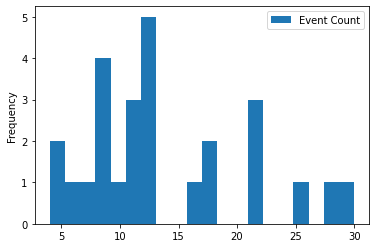

In [69]:
facebook_hist = appbyevent.plot.hist(bins = 20)
plt.show()

<font color='darkcyan' style='font-family:calibri'>
    <p>
        From this bar plot, I can conclude that AT&T has recorded the most visits from me. That tracks since that is my phone provider. A lot of these are pretty interesting. I don't even think I've visited some of these websites, but I do recognize a couple of small businesses and larger companies. 
        <br />
        Something that is particularly interesting is that I ordered a surgical vest from the Marena Group (marena.com) when I went in for a Mastectomy earlier this January. I literally only bought that one vest...yet they've logged nearly 30 visits from me in total.
        <br />
        Off-Facebook activity is a summary of activity that businesses and organizations share with Facebook about user interactions, such as visiting other apps or websites. With the sites and apps that got higher event counts, Facebook would conclude from this data that I frequently visit these websites and am an active customer of these businesses. 
        <br />
        I guess from this data, they'd be correct to say I shop with AT&T for my cell phone service, if they're going off of it getting the highest number of event counts. However, if they concluded that I was a avid visitor to Ollie's Bargain Outlet...they'd be totally wrong. I've only ever driven past that place on the way to Books-A-Million. However, I guess the data is there, so they don't really have much else to go off of. 
    </p>
</font>

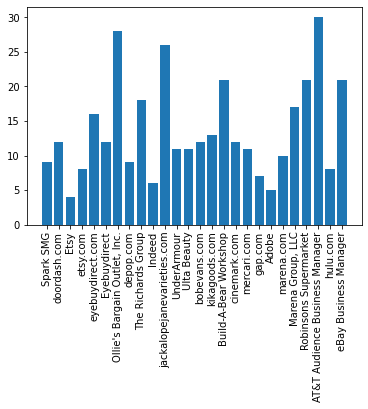

In [70]:
plt.bar(appbyevent['App'],appbyevent['Event Count'])
plt.xticks(rotation=90)
plt.show()

<font color='darkcyan' style='font-family:calibri'>
    <h2>
        Part 2
    </h2>
    <p>
        For the second part of this assignment I will be using the Spotify API to analyze the energy and valence of two albums by one of my favorite bands, Arms Length. I chose energy and valence since they are an alternative/indie band and their music isn't the happiest-sounding. I think these two features are the most distinctive of their genre since their tracks are typically low-valence, but have varying amounts of energy.
        <br />
        They only have two albums: Everything Nice (2021) and Never Before Seen, Never Again Found (2022). Everything Nice came out when they had yet to be signed to an official record label, but Never Before Seen, Never Again Found just dropped and is their first album under a record label, so I think it would be interesting to compare the features of each album.
    </p>
</font>

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Loading in my data here.
    </p>
</font>

In [71]:
audio_features = pd.read_csv('audio_features.csv', sep = ",")

<font color='darkcyan' style='font-family:calibri'>
    <p>
        These two histograms depict the valence and energy for the two albums, with Everything Nice being represented by the brown colored bars, and Never Before Seen, Never Again Found being represented by the blue colored bars.
        <br />
        From these two histograms, I can conclude that both albums are on the lower end of the valence scale (0.6 or lower) but have a pretty mid-high energy on average.
        <br />
        Everything Nice consists of 5 songs that are lower-valence on average, yet have a solid variety. The tracks on this album are consistently on the high-end of the energy spectrum.
        <br />
        Never Before Seen, Never Again Found, has more tracks that are middle-of-the-road on valence, and has a majority of its tracks on the high end of the energy scale. It does have a few tracks that are on the lower end as well.  However, I should note that this album has more than twice the tracks that Everything Nice does. 
    </p>
</font>

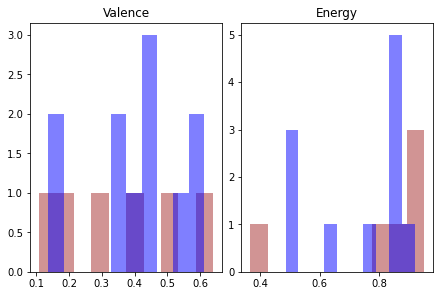

In [72]:
fig1, ax1 = plt.subplots(1, 2, layout = 'constrained')
ax1[0].title.set_text("Valence")
ax1[0].hist(en_df['valence'], alpha = 0.5, color = 'brown', label = 'Everything Nice')
ax1[0].hist(nbs_df['valence'], alpha = 0.5, color = 'blue', label = 'Never Before Seen, Never Again Found')

ax1[1].title.set_text("Energy")
ax1[1].hist(en_df['energy'], alpha = 0.5, color = 'brown', label = 'Everything Nice')
ax1[1].hist(nbs_df['energy'], alpha = 0.5, color = 'blue', label = 'Never Before Seen, Never Again Found')
plt.show()

<font color='darkcyan' style='font-family:calibri'>
    <p>
        These two scatterplots depict the valence of each track on each album in regards to the energy of that track. Everything Nice is represented by the brown colored dots on the left, while Never Before Seen, Never Again Found is represented by the blue colored dots on the right. 
        <br />
        From this scatterplot, we can conclude that Everything Nice has songs that are low-valence, but are high-energy at the same time. There is only one exception, which is a song that is incredibly low on both energy and valence.
        <br />
        Never Before Seen, Never Again Found, has more of a variety. There are tracks that are high-energy and low-valence, but there are also tracks that are high-valence and low energy. In addition, it has some songs that are about even on both valence and energy.
    </p>
</font>

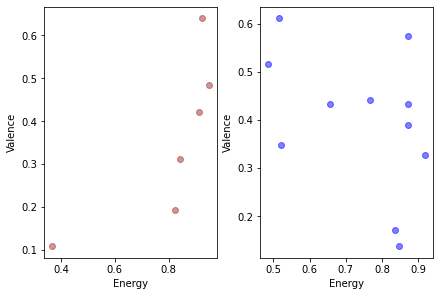

In [73]:
fig1, ax1 = plt.subplots(1,2, layout = 'constrained')
ax1[0].scatter(en_df['energy'], en_df['valence'], alpha = 0.5, color = 'brown')
ax1[0].set_xlabel ('Energy')
ax1[0].set_ylabel('Valence')

ax1[1].scatter(nbs_df['energy'], nbs_df['valence'], alpha = 0.5, color = 'blue')
ax1[1].set_xlabel ('Energy')
ax1[1].set_ylabel('Valence')

plt.show()

<font color='darkcyan' style='font-family:calibri'>
    <p>
        We can combine these two scatterplots into one figure to get a better look at how these two albums differ.
        <br />
        Here, it is more obvious to me that Everything Nice is extremely high-energy, while about half of the tracks Never Before Seen, Never Again Found are high-energy with the rest being relatively low-energy.
    </p>
</font>

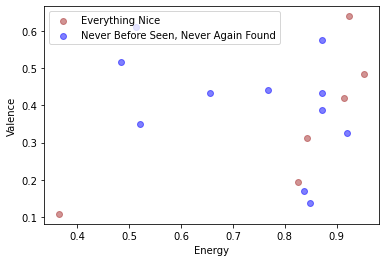

In [74]:
fig1, ax1 = plt.subplots()

ax1.scatter(en_df['energy'], en_df['valence'], alpha = 0.5, color = 'brown', label = 'Everything Nice')
ax1.scatter(nbs_df['energy'], nbs_df['valence'], alpha = 0.5, color = 'blue', label = 'Never Before Seen, Never Again Found')

ax1.set_xlabel ('Energy')
ax1.set_ylabel('Valence')

ax1.legend()
plt.show()

<font color='darkcyan' style='font-family:calibri'>
    <p>
        Since the energy levels of both albums seems pretty clear, I want to get a closer look at the valence of both albums.
        <br />
        The boxplots below show the distribution of valence between the tracks on the two albums. 
        <br />
        Never Before Seen, Never Again Found is consistently middle-valence, with a few songs being on the lower-end, and a couple of them on the higher end. 
        <br />
        Everything Nice is consistently on the way, way lower end. However, it does have a pretty impressive spread of valence between each of its tracks. Of course, between the two albums nothing is higher than 0.6, which is objectively on the lower-end.
    </p>
</font>

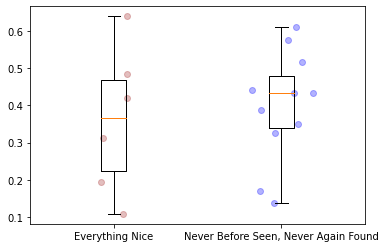

In [75]:
fig2, ax2 = plt.subplots()
en_val = audio_features[audio_features['album'] == 'everything nice']['valence']
nbs_val = audio_features[audio_features['album'] == 'never before seen, never again found']['valence']

en_x = [1] * len(en_val)
nbs_x = [2] * len(nbs_val)

en_x_jitter = np.random.uniform(-0.25, 0.25, len(en_x))
nbs_x_jitter = np.random.uniform(-0.25, 0.25, len(nbs_x))

ax2.scatter(en_x + en_x_jitter, en_val, alpha = 0.3, color = 'brown', label = 'Everything Nice')
ax2.scatter(nbs_x + nbs_x_jitter, nbs_val, alpha = 0.3, color = 'blue', label = 'Never Before Seen, Never Again Found')

ax2.set_xlim(0.5, 2.5)

ax2.boxplot([en_val, nbs_val])
ax2.set_xticks([1, 2], ['Everything Nice', 'Never Before Seen, Never Again Found'])
plt.show()

<font color='darkcyan' style='font-family:calibri'>
    <p>
        However, the P value here is 0.65, which means that we cannot conclude that a significant difference exists. It was fun to nit-pick, though!
    </p>
</font>

In [76]:
stats.ttest_ind(en_val, nbs_val)

Ttest_indResult(statistic=-0.4581151052738326, pvalue=0.6534363509806389)

<font color='darkcyan' style='font-family:calibri'>
<h2>Conclusions</h2>
    <h3>Quality of data // weaknesses and limitations</h3>
    <p>
        Overall, I'm pleased with the quality of my data.
        <br />
        However, for Part 1 of this assignment, it would've been more interesting if I had actually used Facebook more. Then I would've been able to get a larger and potentially more accurate set of data. The data that I was handed was honestly weak and sort of random, with only a handful of apps that made sense.
        <br />
        For Part 2, I really enjoyed analyzing the differences between two albums by the same artist. However, it definitely was limiting having the music be so similar. 
    </p>
    <h3>Alternative approaches // potential next steps</h3>
    <p>
        If I ever want to revisit this in the future, I would like to look further into how Facebook gathers those logged visits. I've been thinking, and maybe it uses my location? That would make more sense to why it thinks I go to Ollie's Bargain Outlet when I actually frequent Books-A-Million. 
        <br />
        Additionally, It would be neat to look into the Spotify API to see what other audio features I can pull from it. 
    </p>
</font>